# 호텔 노쇼 고객 예측 분석

2023.12.16

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 호텔 노쇼 고객 예측 분석
- 설명: ...
- 사용한 데이터셋
    - [Hotel Bookings Analysis](https://www.kaggle.com/datasets/thedevastator/hotel-bookings-analysis): 호텔 예약, 취소 및 투숙객 세부 정보에 대한 포괄적인 데이터셋
- 진행 절차 및 내용
    - 데이터 로딩 및 컬럼별 EDA, 상관관계 확인
    - ...
- 사용한 스킬셋
    - pandas, numpy
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

...

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
hotel_df = pd.read_csv('hotel_bookings.csv', index_col='index')
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
index,,,,,,,,,,,,,,,,,,,,,
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17


In [4]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

|컬럼명|설명|
|:---:|:---|
|hotel|호텔의 종류 (Categorical)|
|is_canceled|예약 취소 여부 (Binary)|
|lead_time|예약일과 도착일 사이의 일수 (Numeric)|
|arrival_date_year|도착일 연도 (Numeric)|
|arrival_date_month|도착일 월 (Categorical)|
|arrival_date_week_number|도착일 주 (Numeric)|
|arrival_date_day_of_month|도착일 일 (Numeric)|
|stays_in_weekend_nights|호텔에 투숙하거나 예약한 주말 밤의 수 (Numeric)|
|stays_in_week_nights|호텔에 투숙하거나 예약한 주박 수 (Numeric)|
|adults, children, babies|연령대별 투숙객수|
|meal|예약 패키지에 포함된 식사 종류 (Categorical)|
|country & market_segment & distribution_channel|인구통계학적 및 고객 분류 정보|
|is_repeated_guest|반복 방문자 여부|
|previous_cancellations|이전 예약을 취소한 횟수|
|previous_bookings_not_canceled|취소하지 않은 이전 예약 수|
|reserved_room_type|원래 예약된 유형의 객실|
|assigned_room_type|최종적으로 할당된 객실 유형|
|booking_changes|도착 전 예약 변경 횟수|
|deposit_type|예약을 위해 입금된 유형 (Categorical)|
|agent & company|예약에 관련된 여행사 & 회사|
|days_in_waiting_list|예약이 확인 또는 취소되기 전 대기 목록에 있었던 일수|
|customer_type|고객 유형 정보 (Categorical)|
|adr|객실당 일평균 요금(전체 비용/숙박 일수) (Numeric)|

### 2-2. 데이터 분포 확인 및 전처리

#### 2-2-1. 호텔 종류

In [32]:
hotel_df['hotel'].value_counts().to_frame()

,hotel
City Hotel,79330
Resort Hotel,40060


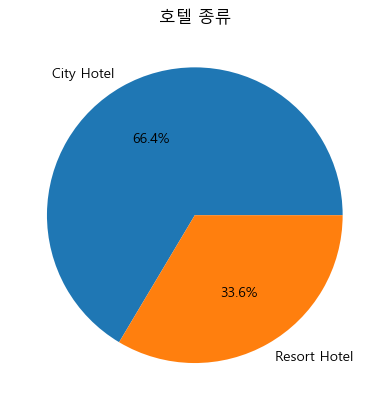

In [24]:
plt.pie(
    hotel_df['hotel'].value_counts(),
    labels=hotel_df['hotel'].value_counts().index,
    autopct="%.1f%%"
)
plt.title('호텔 종류')
plt.show()

#### 2-2-2. 예약 취소

In [31]:
hotel_df['is_canceled'].value_counts().to_frame()

,is_canceled
0,75166
1,44224


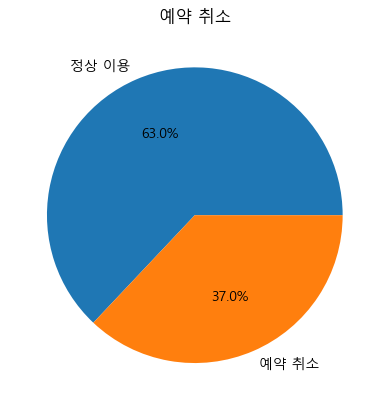

In [30]:
plt.pie(
    hotel_df['is_canceled'].value_counts(),
    labels=hotel_df['is_canceled'].value_counts().index.map({0: '정상 이용', 1: '예약 취소'}),
    autopct="%.1f%%"
)
plt.title('예약 취소')
plt.show()

생각보다 예약 취소한 비율이 많다.

#### 2-1-3. 도착 일자

In [39]:
hotel_df['arrival_date_year'].value_counts().to_frame().reset_index().sort_values('index').reset_index(drop=True)

,index,arrival_date_year
0,2015,21996
1,2016,56707
2,2017,40687


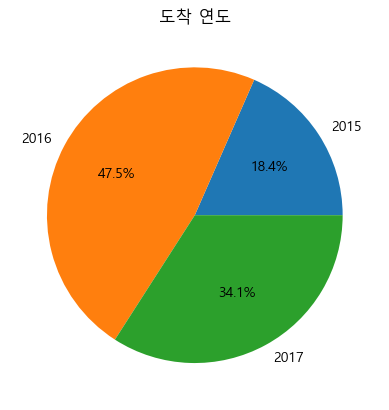

In [42]:
plt.pie(
    hotel_df['arrival_date_year'].value_counts().to_frame().reset_index().sort_values('index')['arrival_date_year'],
    labels=hotel_df['arrival_date_year'].value_counts().to_frame().reset_index().sort_values('index')['index'],
    autopct="%.1f%%"
)
plt.title('도착 연도')
plt.show()

2015~2017년의 분포이며 2016년 데이터가 가장 많다.

In [62]:
# 월별 집계
arrival_month_df = hotel_df['arrival_date_month'].value_counts().to_frame().reset_index()

# 월 순서에 따라 정렬
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
arrival_month_df['index'] = pd.Categorical(
    arrival_month_df['index'], categories=month_order, ordered=True
)
sorted_arrival_month_df = arrival_month_df.sort_values('index').reset_index(drop=True)

sorted_arrival_month_df

,index,arrival_date_month
0,January,5929
1,February,8068
2,March,9794
3,April,11089
4,May,11791
5,June,10939
6,July,12661
7,August,13877
8,September,10508
9,October,11160


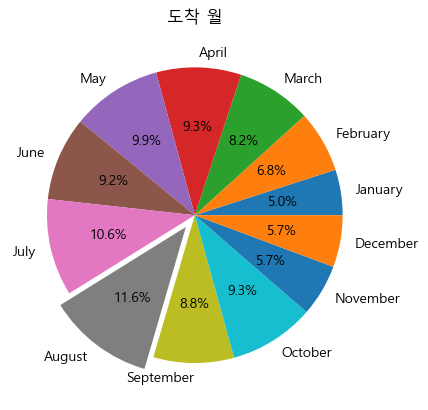

In [72]:
max_index = sorted_arrival_month_df[
    sorted_arrival_month_df['arrival_date_month'] == sorted_arrival_month_df['arrival_date_month'].max()
].index[0]

plt.pie(
    sorted_arrival_month_df['arrival_date_month'],
    explode=[0.1 if i == max_index else 0 for i in range(len(sorted_arrival_month_df))],
    labels=sorted_arrival_month_df['index'],
    autopct="%.1f%%"
)

plt.title('도착 월')
plt.show()

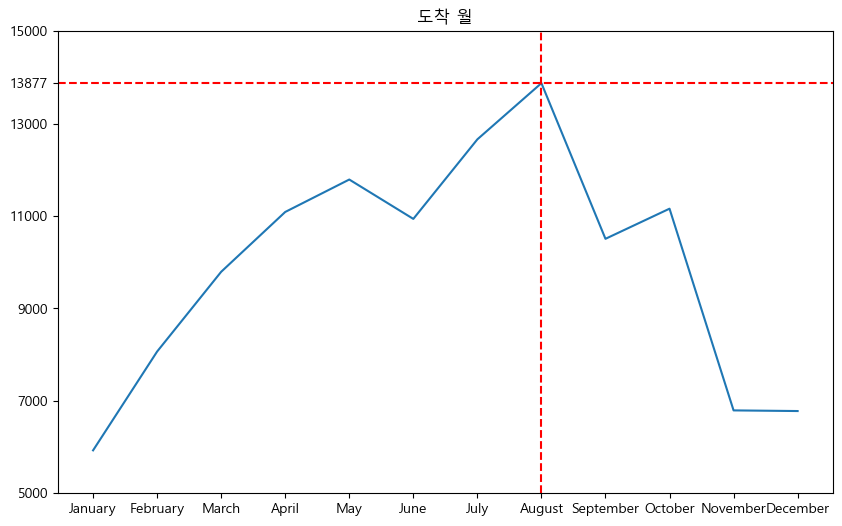

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(
    'index', 'arrival_date_month', data=sorted_arrival_month_df
)

plt.title('도착 월')
plt.axhline(sorted_arrival_month_df['arrival_date_month'].max(), linestyle='--', color='red')
plt.axvline(max_index, linestyle='--', color='red')
plt.yticks([i for i in range(5000, 15001, 2000)] + [sorted_arrival_month_df['arrival_date_month'].max()])

plt.show()

**8월**이 가장 많고 전반적으로 여름 휴가철이 많은 편에 속한다. 반면 겨울철은 여름철의 절반 수준으로 낮다.

#### 2-1-4. 예약 일정

In [101]:
hotel_df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

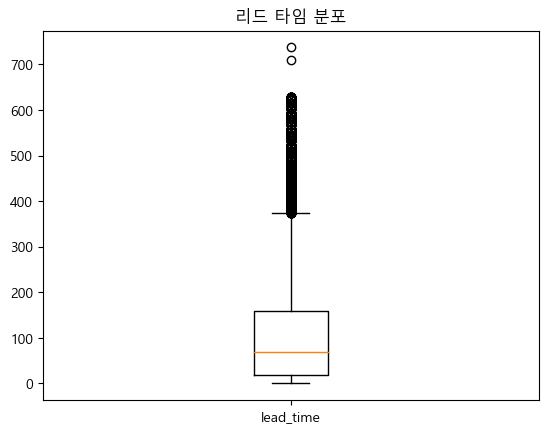

In [115]:
plt.boxplot(hotel_df['lead_time'], labels=['lead_time'])
plt.title('리드 타임 분포')
plt.show()

일반적으로 방문하기 **18일 ~ 160일 전**에 예약하는 것으로 확인된다. 당일 예약의 사례도 있고 737일(2년 전...?)의 사례도 있다.

In [138]:
hotel_df['stays_in_weekend_nights'].value_counts().to_frame().reset_index().sort_values('index').set_index('index')

,stays_in_weekend_nights
index,
0,51998
1,30626
2,33308
3,1259
4,1855
5,79
6,153
7,19
8,60


숙박 일정 중 주말 밤을 안 끼는 경우가 가장 많다. 최대값은 19번인데, 주말 밤을 19번이나 보냈다는 건 두 달 이상을 연속으로 투숙한 케이스로 이해할 수 있다.

In [139]:
hotel_df['stays_in_week_nights'].value_counts().to_frame().reset_index().sort_values('index').set_index('index')

,stays_in_week_nights
index,
0,7645
1,30310
2,33684
3,22258
4,9563
5,11077
6,1499
7,1029
8,656


평일의 경우 1박 ~ 3박의 케이스가 가장 많다.

근데 총 몇 박인지를 설명하는 컬럼이 없네? 파생 컬럼을 하나 만들어 주는 게 좋겠다.

In [133]:
hotel_df['stays_in_every_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
hotel_df[['stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_every_nights']]

,stays_in_weekend_nights,stays_in_week_nights,stays_in_every_nights
index,,,
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2
...,...,...,...
119385,2,5,7
119386,2,5,7
119387,2,5,7


#### 2-2-5. 투숙객 연령대

In [137]:
hotel_df['adults'].value_counts().reset_index().sort_values('index').set_index('index')

,adults
index,
0,403
1,23027
2,89680
3,6202
4,62
5,2
6,1
10,1
20,2


투숙객의 경우 성인이 2명인 경우가 압도적으로 많다. 성인이 0명인 케이스와 55명(...?)인 케이스도 있다.

In [140]:
hotel_df['children'].value_counts().reset_index().sort_values('index').set_index('index')

,children
index,
0.0,110796
1.0,4861
2.0,3652
3.0,76
10.0,1


어린이는 0명인 경우가 가장 많다.

In [141]:
hotel_df['babies'].value_counts().reset_index().sort_values('index').set_index('index')

,babies
index,
0,118473
1,900
2,15
9,1
10,1


아기 역시 마찬가지다. 이상을 통해, **성인들끼리 방문하는 경우**가 가장 많음을 파악할 수 있다.

이제 전체 투숙객이 몇 명인지 나타내는 파생 컬럼도 있으면 좋을 것 같다.

In [143]:
hotel_df['guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df[['guests', 'adults', 'children', 'babies']]

,guests,adults,children,babies
index,,,,
0,2.0,2,0.0,0
1,2.0,2,0.0,0
2,1.0,1,0.0,0
3,1.0,1,0.0,0
4,2.0,2,0.0,0
...,...,...,...,...
119385,2.0,2,0.0,0
119386,3.0,3,0.0,0
119387,2.0,2,0.0,0


#### 2-2-6. 이전 예약

In [150]:
hotel_df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

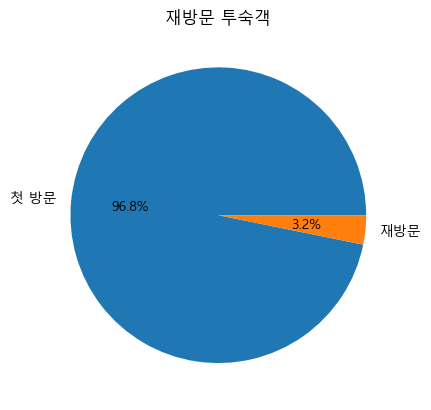

In [151]:
plt.pie(
    hotel_df['is_repeated_guest'].value_counts(),
    labels=hotel_df['is_repeated_guest'].value_counts().index.map({0: '첫 방문', 1: '재방문'}),
    autopct="%.1f%%"
)
plt.title('재방문 투숙객')
plt.show()

**첫 방문**인 투숙객이 압도적으로 많다.

In [155]:
hotel_df['previous_cancellations'].describe()

count    119390.000000
mean          0.087118
std           0.844336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: previous_cancellations, dtype: float64

이전에 취소한 예약이 없는 투숙객이 압도적으로 많다. 당연하다. 첫 방문인 투숙객이 압도적으로 많으니까

In [158]:
hotel_df[hotel_df['is_repeated_guest'] == 1]['previous_cancellations'].describe()

count    3810.000000
mean        0.469816
std         1.440792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        21.000000
Name: previous_cancellations, dtype: float64

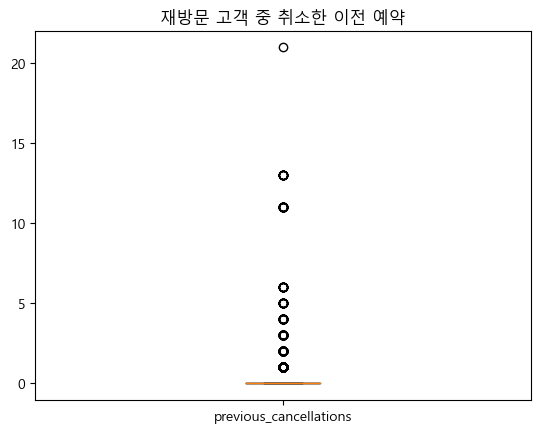

In [167]:
plt.boxplot(hotel_df[hotel_df['is_repeated_guest'] == 1]['previous_cancellations'], labels=['previous_cancellations'])
plt.title('재방문 고객 중 취소한 이전 예약')
plt.show()

재방문 고객 중에서 이전에 취소한 예약이 있는지 여부를 살펴봤는데 여전히 **0건**인 경우가 일반적이다.

In [157]:
hotel_df[hotel_df['is_repeated_guest'] == 1]['previous_bookings_not_canceled'].describe()

count    3810.000000
mean        3.585039
std         7.115979
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        72.000000
Name: previous_bookings_not_canceled, dtype: float64

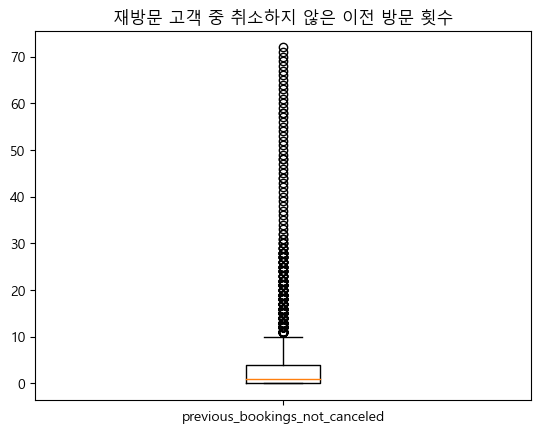

In [166]:
plt.boxplot(hotel_df[hotel_df['is_repeated_guest'] == 1]['previous_bookings_not_canceled'], labels=['previous_bookings_not_canceled'])
plt.title('재방문 고객 중 취소하지 않은 이전 방문 횟수')
plt.show()

비슷한 방법으로 재방문 고객 중 취소하지 않은 이전 방문 횟수를 살펴봤다. 왜 0건이 있는지 잘은 모르겠지만(...) **0~4건**이 일반적이다.

#### 2-2-7. 방문 이전 예약 행태

In [160]:
hotel_df['booking_changes'].describe()

count    119390.000000
mean          0.221124
std           0.652306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64

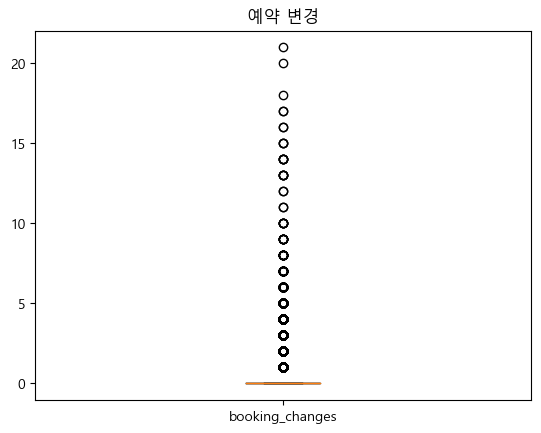

In [165]:
plt.boxplot(hotel_df['booking_changes'], labels=['booking_changes'])
plt.title('예약 변경')
plt.show()

방문 이전에 예약을 변경한 케이스를 살펴봤는데 **0건**이 일반적이다.

In [159]:
hotel_df['days_in_waiting_list'].describe()

count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

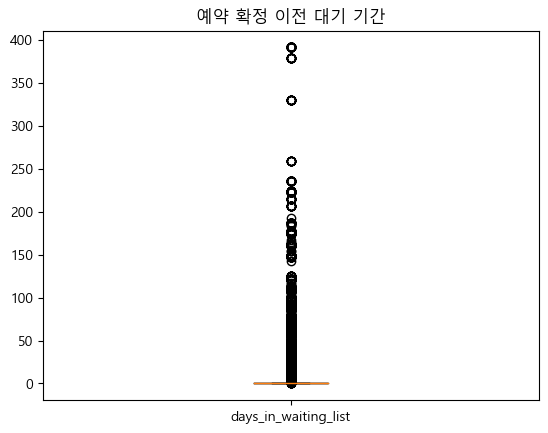

In [169]:
plt.boxplot(hotel_df['days_in_waiting_list'], labels=['days_in_waiting_list'])
plt.title('예약 확정 이전 대기 기간')
plt.show()

예약 확정 이전 대기 목록에 있던 기간도 **0일**이 일반적인 케이스다.

#### 2-2-8. 결제 금액

In [173]:
hotel_df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

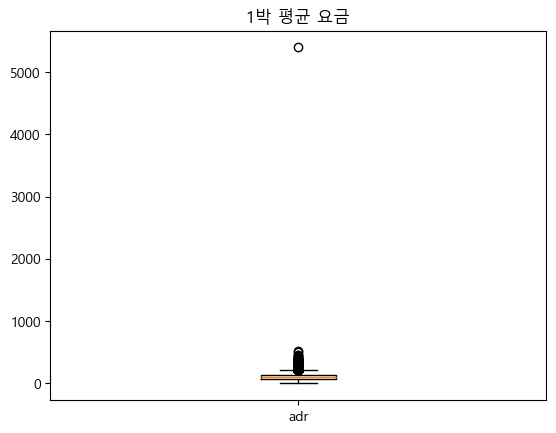

In [175]:
plt.boxplot(hotel_df['adr'], labels=['adr'])
plt.title('1박 평균 요금')
plt.show()

1박 평균 요금은 **69달러 ~ 126달러**가 일반적이다.

여기서 총 결제 금액 컬럼을 만들어 두면 좋을 것 같다.

In [176]:
hotel_df['total_price'] = hotel_df['adr'] * hotel_df['stays_in_every_nights']
hotel_df[['adr', 'stays_in_every_nights', 'total_price']]

,adr,stays_in_every_nights,total_price
index,,,
0,0.00,0,0.00
1,0.00,0,0.00
2,75.00,1,75.00
3,75.00,1,75.00
4,98.00,2,196.00
...,...,...,...
119385,96.14,7,672.98
119386,225.43,7,1578.01
119387,157.71,7,1103.97


### 2-3. 상관관계 확인

In [198]:
corr_df = np.abs(hotel_df.corr())
corr_df

C:\Users\louis\AppData\Local\Temp\ipykernel_11732\1066587922.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = np.abs(hotel_df.corr())


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays_in_every_nights,guests,total_price
is_canceled,1.000000,0.293123,0.016660,0.008148,0.006130,0.001791,0.024765,0.060017,0.005048,0.032491,...,0.144381,0.083114,0.020642,0.054186,0.047557,0.195498,0.234658,0.017779,0.046506,0.046562
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,0.037622,0.020915,...,0.000149,0.069741,0.151464,0.170084,0.063077,0.116451,0.095712,0.157167,0.072279,0.086778
arrival_date_year,0.016660,0.040142,1.000000,0.540561,0.000221,0.021497,0.030883,0.029635,0.054624,0.013192,...,0.030872,0.063457,0.259095,0.056497,0.197580,0.013684,0.108531,0.031438,0.052152,0.124350
arrival_date_week_number,0.008148,0.126871,0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,...,0.005508,0.031201,0.076760,0.022933,0.075791,0.001920,0.026149,0.018719,0.025216,0.059243
arrival_date_day_of_month,0.006130,0.002268,0.000221,0.066809,1.000000,0.016354,0.028174,0.001566,0.014544,0.000230,...,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062,0.027408,0.006758,0.002528
stays_in_weekend_nights,0.001791,0.085671,0.021497,0.018208,0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,...,0.063281,0.140739,0.066749,0.054151,0.049342,0.018554,0.072671,0.762790,0.101439,0.572201
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,...,0.096209,0.182382,0.182211,0.002020,0.065237,0.024859,0.068192,0.941005,0.101670,0.703020
adults,0.060017,0.119519,0.029635,0.025909,0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,...,0.051673,0.035594,0.207793,0.008283,0.230641,0.014785,0.122884,0.105249,0.821102,0.193601
children,0.005048,0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,...,0.048949,0.041066,0.030931,0.033273,0.324854,0.056253,0.081745,0.050864,0.579373,0.232072
babies,0.032491,0.020915,0.013192,0.010395,0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,...,0.083440,0.036184,0.019206,0.010621,0.029186,0.037383,0.097889,0.022283,0.162690,0.037839


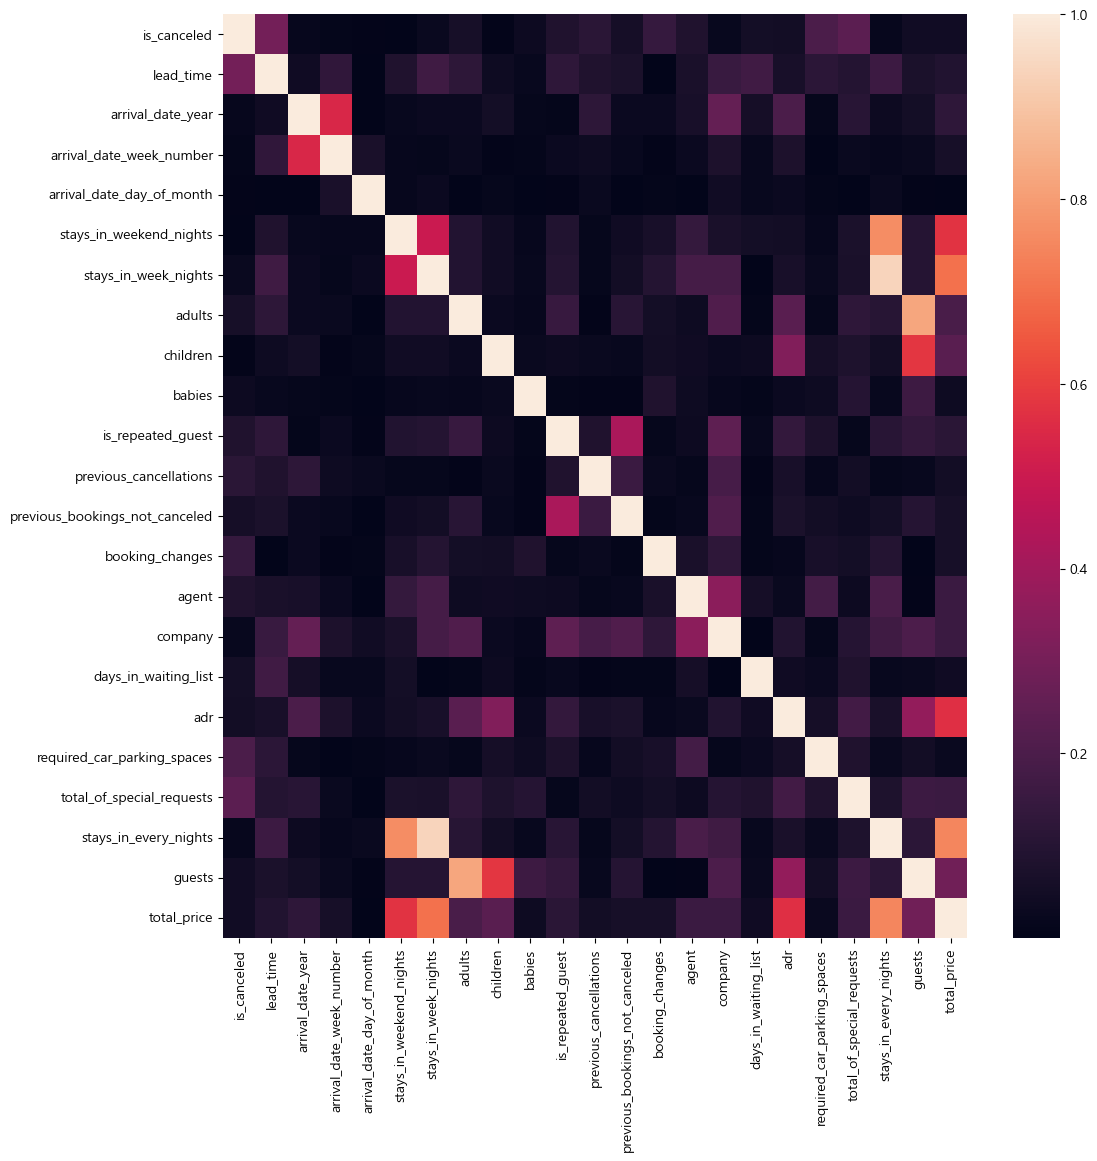

In [199]:
plt.figure(figsize=(12, 12))
sns.heatmap(np.abs(corr_df))
plt.show()

컬럼이 굉장히 많은 것에 비해 대부분이 시커멓기 때문에, 상관관계가 0.5 이상인 것들만 살펴보면 좋을 것 같다.

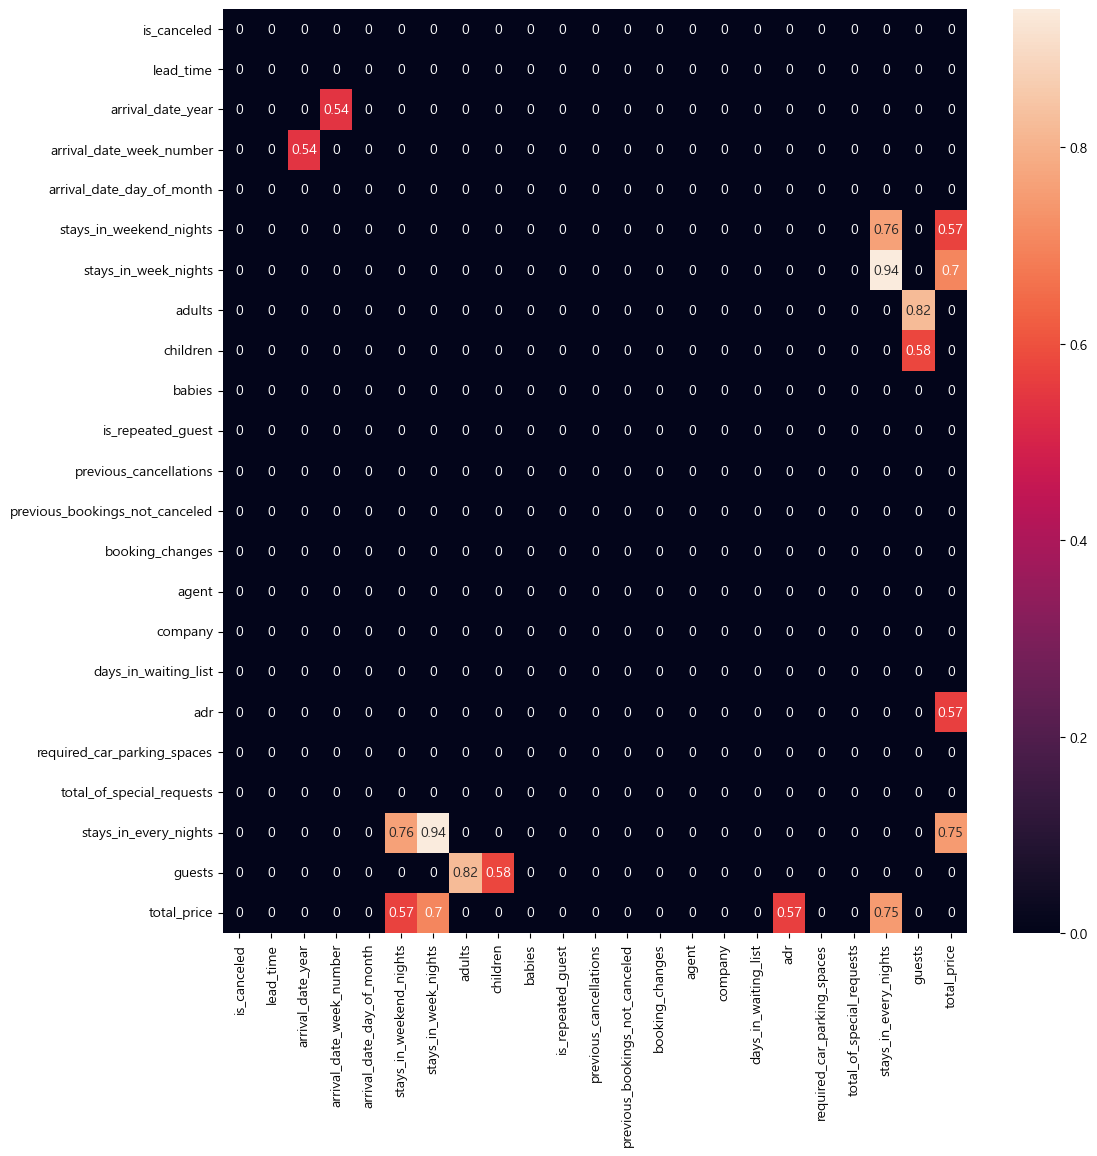

In [202]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr_df[(corr_df >= 0.5) & (corr_df < 1)].fillna(0),
    annot=True
)
plt.show()

당연히 선형 관계가 있어야만 하는 컬럼들 제외하면 딱히 눈에 띄는 게 없다.

In [205]:
# pickle로 저장
with open('hotel_df.pkl', 'wb') as file:
    pickle.dump(hotel_df, file)

---

## 3. 데이터 분석

### 3-1. 문제 정의

초특가(25)씨는 숙박업체 예약 전문 앱을 운영하는 '자놀자'에서 데이터 분석가로 재직하는 중이다. 자놀자는 현재 이용객의 노쇼 문제로 고민이 이만저만이 아니다. 자놀자는 숙박 중개업자로서 노쇼 비용의 일부를 영업장에 부담해야 하기 때문이다. 또한 노쇼 고객으로 인해 수익의 기회가 상실된다는 점도 자놀자의 비즈니스에 부정적인 요인이다.

특가씨는 자놀자의 영업이익 제고와 원활한 운영을 위해 **노쇼 위험 고객**을 미리 식별할 방법을 구상하고자 한다. 지금부터 특가씨의 입장에서, 데이터 분석 방법론을 적용하여 이탈 고객을 예측하는 프로젝트를 진행한다.

**(예상 flow)**
- 분석에 투입할 컬럼 선정
- y = ```is_canceled```에 대한 분류 모델 생성
- 결과 해석하여 노쇼 의심 고객의 특성을 식별
- 비즈니스적인 액션 아이템 도출

### 3-2. 데이터 분석

In [ ]:
# 가설 검정, 머신러닝, ...

### 3-3. 결과 해석

...

---

## 4. 후기

...